In [2]:
# move files in '.\data\*.gz' to '.\data\dali_samples\*.gz'
import os
import shutil
import librosa
import matplotlib.pyplot as plt
import numpy as np

def generate_mel_spectrogram(file_path, save_path=None):
    # Load the audio file
    y, sr = librosa.load(file_path)
    y_clip = y[:sr*5]  # Clip the audio to 5 seconds
    file_name = file_path.split('\\')[-1]

    mel_signal = librosa.feature.melspectrogram(y=y_clip, sr=sr)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    plt.figure(figsize=(5, 5))
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram of {file_name}')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.tight_layout()

    # Save or display the spectrogram
    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()


In [3]:
# get all files from './data/wav/*.wav'
files = os.listdir('./data/wav')

In [8]:
file = os.path.join('.\data\wav', files[0])

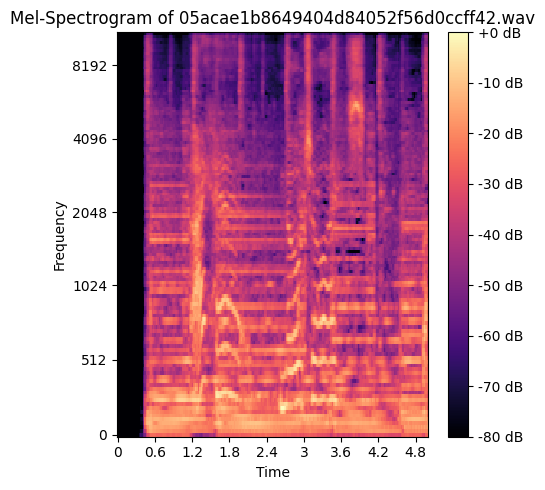

In [9]:
generate_mel_spectrogram(file)